In [36]:
## 모형 불러오기
import trimesh
import numpy as np
from scipy.constants import point

model = trimesh.load('./obj/model.stl')

In [37]:
samples, face_indexes = trimesh.sample.sample_surface_even(model, 300)

normals = []
tangents = []

# 각 샘플링된 점에 대해 법선 벡터 추가
for i in range(len(samples)):
    sample = samples[i]  # 표면 위의 샘플링된 점
    face_index = face_indexes[i]  # 해당 점이 속한 삼각형 면의 인덱스

    # 삼각형 면의 법선 벡터 가져오기
    normal = model.face_normals[face_index]

    # 샘플 점과 법선 벡터 결합
    normals.append(normal)
    
    tangent_vector_point = model.triangles[face_index][0]
    vector  = np.subtract(tangent_vector_point, sample) 
    tangent = np.cross(vector, normal)
    
    # 탄젠트 벡터 정규화 (길이 1로 만들기)
    tangent_norm = np.linalg.norm(tangent)
    if tangent_norm != 0:
        tangent = tangent / tangent_norm

    tangents.append(tangent)

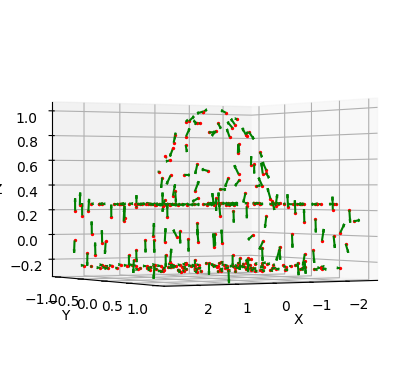

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 샘플링된 점과 그 점에서의 법선 벡터 시각화
for i in range(len(samples)):

    # 샘플링된 점 그리기
    ax.scatter(samples[i][0], samples[i][1], samples[i][2], color='red', s=2)

    # # 법선 벡터 그리기
    # ax.quiver(samples[i][0], samples[i][1], samples[i][2],
    #           normals[i][0], normals[i][1], normals[i][2],
    #           length=0.1, color='blue')

    # 탄젠트 벡터 그리기
    ax.quiver(samples[i][0], samples[i][1], samples[i][2],
              tangents[i][0], tangents[i][1], tangents[i][2],
              length=0.1, color='green')

# 축과 제목 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=60)

plt.show()

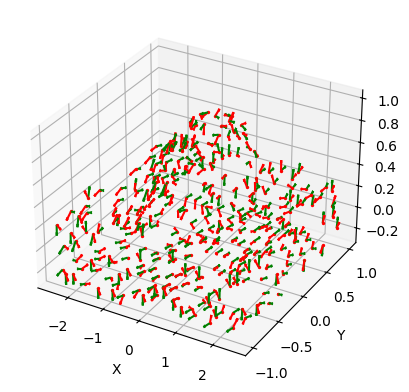

In [51]:
from scipy.spatial.transform import Rotation as R


vecs = []

for i in range(len(tangents)):
    # 오일러 각 (yaw, pitch, roll) 정의 (라디안 단위)
    
    ## 기준 축이 아니라 각도를 조정하는거
    ## 축 설정 필요
    yaw = samples[i][0]  # z 축을 기준으로 회전하는 각도 (yaw)
    pitch = samples[i][1]  # y 축을 기준으로 회전하는 각도 (pitch)
    roll = samples[i][2]  # x 축을 기준으로 회전하는 각도 (roll)
    
    # 오일러 각을 회전 객체로 변환
    rot = R.from_euler('zyx', [yaw, pitch, roll])
    
    # 회전을 적용할 벡터 정의
    vec = [tangents[i][0], tangents[i][1], tangents[i][2]]
    
    # 회전 적용
    rotated_vec = rot.apply(vec)
    
    # 탄젠트 벡터 정규화 (길이 1로 만들기)
    rotated_vec_norm = np.linalg.norm(rotated_vec)
    if rotated_vec_norm != 0:
        rotated_vec = rotated_vec / rotated_vec_norm
        
    vecs.append(rotated_vec)

# 시각화를 위한 준비
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(tangents)):
    
    # 샘플링된 점 그리기
    ax.scatter(samples[i][0], samples[i][1], samples[i][2], color='red', s=2)
    
    # 원래 벡터를 시각화
    ax.quiver(samples[i][0], samples[i][1], samples[i][2],
              tangents[i][0], tangents[i][1], tangents[i][2],
              length=0.1, color='green')
    
    # 회전된 벡터를 시각화
    ax.quiver(samples[i][0], samples[i][1], samples[i][2],
              vecs[i][0], vecs[i][1], vecs[i][2], length= 0.1, color='r')

# 축 레이블 추가
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 그래프 출력
plt.show()